# Strategy Class

In [1]:
### Main libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from coinapi_rest_v1 import CoinAPIv1
from logins import CoinAPI_KEY
from robin_helperfunctions import round_to_hour

from robinhoodstrategy import cryptoStrategy, BackcastStrategy, Trade

___
### Testing

In [2]:
test_strategy = cryptoStrategy('4MA')

In [8]:
def entry_exit_func(hist_data, position_flag, trade=None):
    
    ma_3 = hist_data['close'].rolling(3).mean()
    ma_8 = hist_data['close'].rolling(8).mean()
    ma_13 = hist_data['close'].rolling(13).mean()
    ma_21 = hist_data['close'].rolling(21).mean()
    ma_55 = hist_data['close'].rolling(55).mean()

    
    if position_flag:
        if (ma_3[-1] <= ma_8[-1]):
            return 'sell'
        else:
            return 'pass'
    elif ma_8[-1] > ma_13[-1] > ma_21[-1] > ma_55[-1]:
            return 'buy'
    else:
        return 'pass'
test_strategy.add_entryExit_conditions(entry_exit_func)

In [12]:
backtest = BackcastStrategy(test_strategy)
backtest.set_parameters(1000, 'XETHZUSD', '240', 1, 55)
backtest.run_backcast()

Running backcast. Staring with $1000


In [13]:
backtest.trades

,trade_start,trade_end,peirods,time_held,buy_price,sell_price,pct_change,current_capital
0,2020-05-28 19:00:00-05:00,2020-05-31 07:00:00-05:00,14,2 days 12:00:00,221.67,233.78,0.054631,1054.630757
1,2020-05-31 11:00:00-05:00,2020-05-31 15:00:00-05:00,0,0 days 04:00:00,236.54,231.76,-0.020208,1033.318781
2,2020-05-31 19:00:00-05:00,2020-05-31 23:00:00-05:00,0,0 days 04:00:00,238.40,238.63,0.000965,1034.315690
3,2020-06-01 19:00:00-05:00,2020-06-02 11:00:00-05:00,3,0 days 16:00:00,247.21,236.20,-0.044537,988.250338
4,2020-06-02 15:00:00-05:00,2020-06-02 19:00:00-05:00,0,0 days 04:00:00,237.55,235.59,-0.008251,980.096389
5,2020-06-02 23:00:00-05:00,2020-06-03 03:00:00-05:00,0,0 days 04:00:00,237.02,239.81,0.011771,991.633259
6,2020-06-05 03:00:00-05:00,2020-06-05 07:00:00-05:00,0,0 days 04:00:00,242.84,241.73,-0.004571,987.100591
7,2020-06-08 11:00:00-05:00,2020-06-09 03:00:00-05:00,3,0 days 16:00:00,242.40,243.40,0.004125,991.172789
8,2020-06-09 07:00:00-05:00,2020-06-09 11:00:00-05:00,0,0 days 04:00:00,243.45,243.42,-0.000123,991.050648
9,2020-06-09 19:00:00-05:00,2020-06-10 03:00:00-05:00,1,0 days 08:00:00,243.79,242.80,-0.004061,987.026118


In [11]:
backtest.backcast_results()


                # Wins: 21

                Average Win: 0.03467678424270216

                # Losses: 23

                Average Loss: -0.012534941212210559

                Win %: 0.4772727272727273

                Overall return: 474.6314459933262

                Percent return: 0.47463144599332624

                


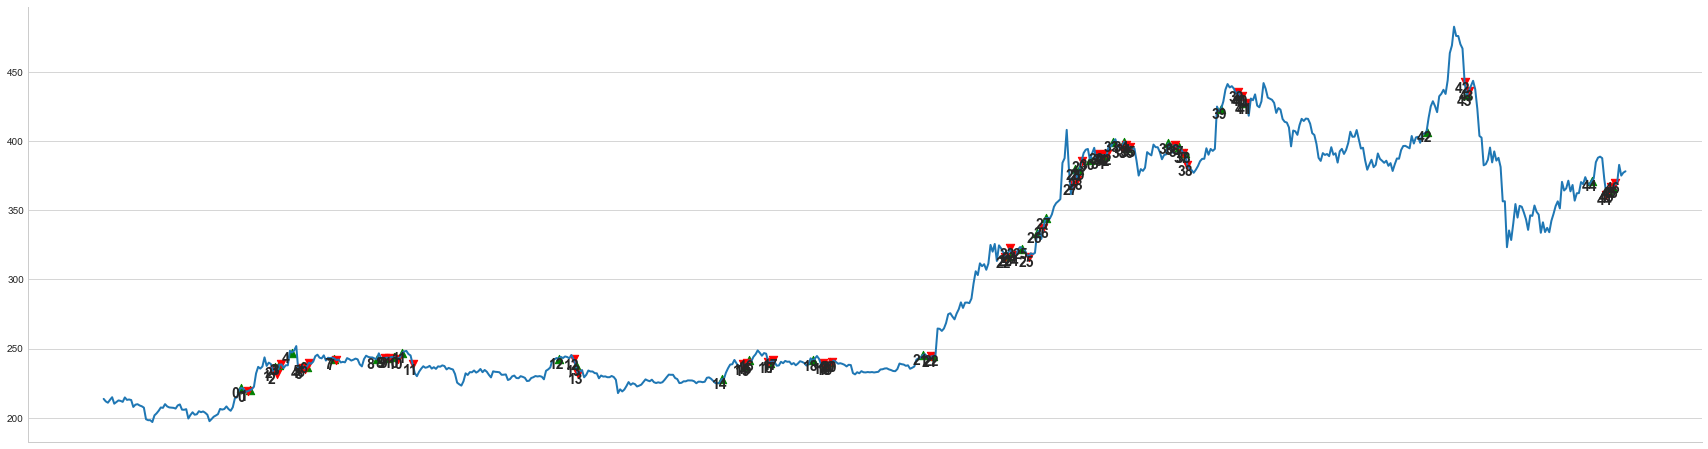

In [7]:
backtest.plot_trades()

___